# 02 - Additive interactions & Categorical interactions

In [5]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import mutual_info_regression
import shap
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [6]:
# Load your dataset
df = pd.read_csv("Numeric data (last year work).csv")

# Separate features (X) and target (y)
X = df.drop("Rating", axis=1)  # Replace "Rating" with your target column name
y = df["Rating"]


Additive Interaction Plot:


ValueError: Could not find feature named: Rating

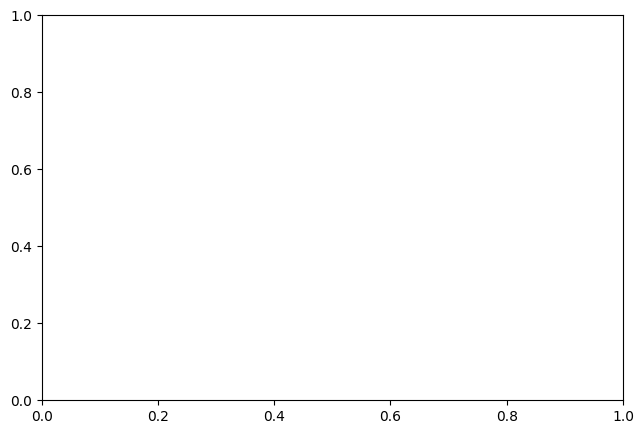

In [9]:
# Additive Interactions with SHAP

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP interaction values
shap_interaction_values = explainer.shap_interaction_values(X)

# Visualize interaction between two specific features
print("Additive Interaction Plot:")
shap.dependence_plot(
    ("Meta Score", "Rating"),  # Two features to analyze
    shap_interaction_values,
    X
)

In [ ]:
# For categorical interactioins
# I need to make some columns categorical


In [8]:
# Categorical Interactions


# Example: Interaction between "PG Rating" (categorical) and "Meta Score" (numeric)
categorical_feature = "PG Rating"  # Replace with a categorical column in your dataset
numeric_feature = "Meta Score"  # Replace with a numeric column in your dataset

# Prepare a combined dataframe for interaction analysis
interaction_df = pd.concat([X[categorical_feature], X[numeric_feature], y], axis=1)
interaction_df.columns = [categorical_feature, numeric_feature, "Rating"]

# Visualize the interaction using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=categorical_feature, 
    y=numeric_feature, 
    hue="Rating",  # Optionally split by the target variable
    data=interaction_df
)
plt.title(f"Interaction between {categorical_feature} and {numeric_feature}")
plt.show()


KeyError: 'PG Rating'